In [1]:
import numpy as np
import astropy.io.fits as pyfits
import astropy.wcs as wcs
import matplotlib.pyplot as plt

import velocity_axis_datacube as vad

In [2]:
#### User input ####
## 0: begin velocity to integrate 13CO
## 1: end velocity to integrate 13CO
## 2: name of the region
names = {
    'W40_CII_final_20_8_0p5_clean': [0., 15., 'W40'],
    'RCW36_CII_final_20_8_0p5_clean': [0., 15., 'RCW36'],
    'RCW120_CII_final_20_8_0p5_clean': [-15., 0., 'RCW120'],
    #'OrionA_CII_final_20_8_0p5_clean': 'M42', 
    'NGC7538_CII_final_20_8_0p5_clean': [-65., -45., 'NGC7538'],
    'RCW79_CII_final_20_8_0p5_clean': [-55., -40., 'RCW79'], 
    'm16_CII_final_20_8_0p5_clean': [10., 30., 'M16'], 
    'm17_CII_final_20_8_0p5_clean': [15., 25., 'M17'],    
    'RCW49_CII_final_20_8_0p5_clean': [-10., 20., 'RCW49'],
}

####################

In [3]:
## Remove 3rd and 4th dimension from the header
def header_to_2D(header):
    header['NAXIS'] = 2
    
    ## remove 3rd dimension
    try:
        del header['NAXIS3']
        del header['CRPIX3']
        del header['CRVAL3']
        del header['CDELT3']
    except:
        print('no 3rd dimension')
    try:
        del header['CTYPE3']
    except:
        pass
    try:
        del header['CUNIT3']
    except:
        pass
    try:
        del header['CROTA3']
    except: 
        pass
    
    ## remove the 4th dimension
    try:
        del header['NAXIS4']
        del header['CRPIX4']
        del header['CRVAL4']
        del header['CDELT4']
    except:
        print('no 4th dimension')
    try:
        del header['CTYPE4']
    except:
        pass
    try:
        del header['CUNIT4']
    except:
        pass
    try:
        del header['CROTA4']
    except: 
        pass
        
    return header

In [4]:
## plot the integrated [CII] and 13CO map next to each other
def plot_CII_CO(data_CII, map_13CO, w_CII, w_13):
    ## plot [CII] & 13CO map
    fig, ax = plt.subplots(figsize = (12, 5))
    ax1 = fig.add_subplot(121, projection = w_CII)
    ax2 = fig.add_subplot(122, projection = w_13)
    
    ## handle the maximum plotted value for 13CO
    #max_val = np.nanmax(map_13CO)
    #if max_val > 50.: max_val = 50.
    
    im1 = ax1.imshow(data_CII, origin='lower', vmin=0., cmap = 'viridis')
    im2 = ax2.imshow(map_13CO, origin='lower', vmin=0., cmap = 'viridis')#, vmax = max_val)
    
    ## axis labels
    ax1.set_xlabel('RA [J2000]')
    ax1.set_ylabel('DEC [J2000]')
    ax2.set_xlabel('RA [J2000]')
    ax2.set_ylabel('DEC [J2000]')
    
    ## set colorbar
    cbar1 = fig.colorbar(im1)
    cbar1.set_label('$\int$T$_{mb}$ dv (K km s$^{-1}$)', labelpad=15., rotation=270.)
    cbar2 = fig.colorbar(im2)
    cbar2.set_label('$\int$T$_{mb}$ dv (K km s$^{-1}$)', labelpad=15., rotation=270.)
    
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    

Filename: ../data_timescale/CO_data/W40_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (238, 209, 1666)   float32   


no 4th dimension


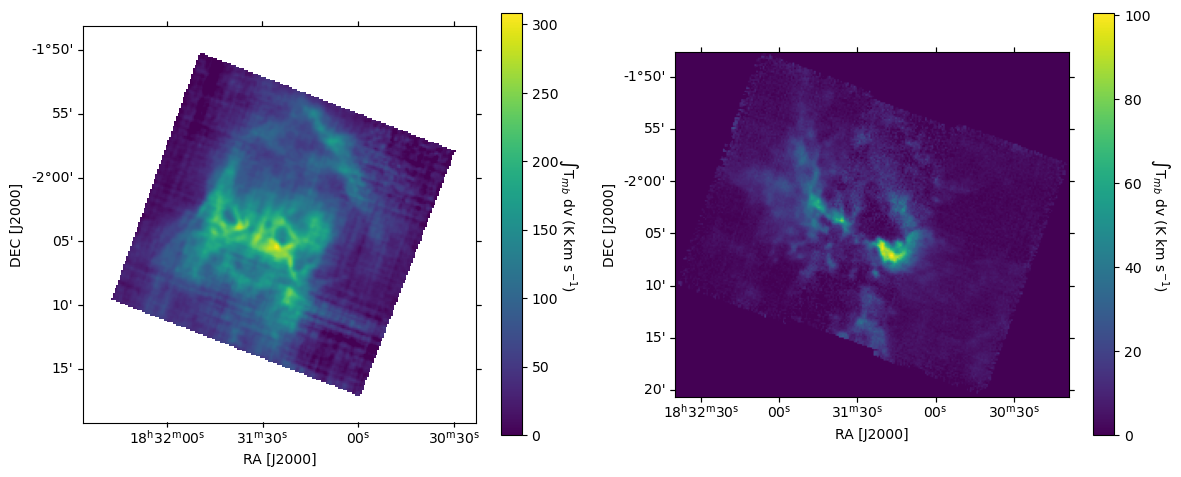

Filename: ../data_timescale/CO_data/RCW36_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (135, 107, 2500, 1)   int32 (rescales to float64)   


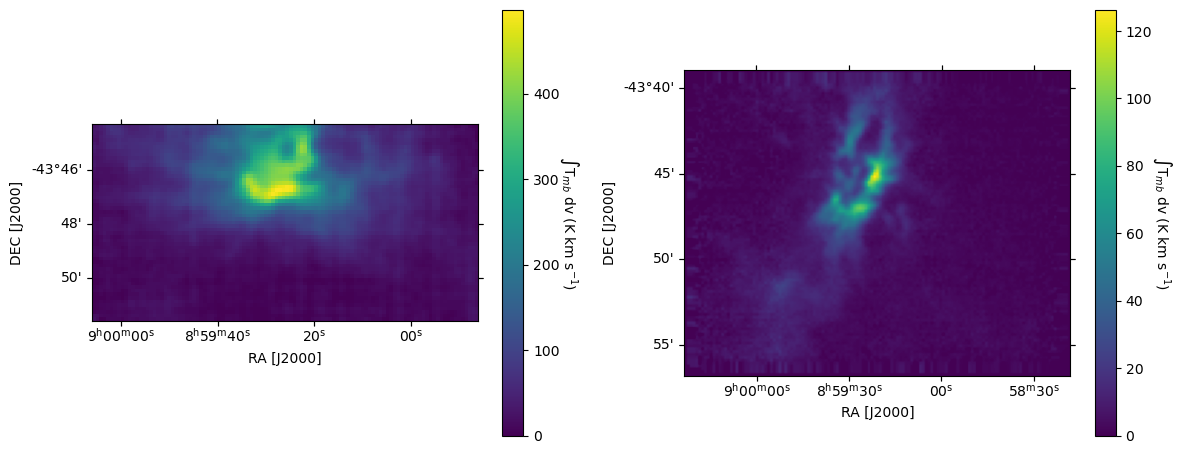

Filename: ../data_timescale/CO_data/RCW120_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (108, 109, 5000, 1)   int32 (rescales to float64)   


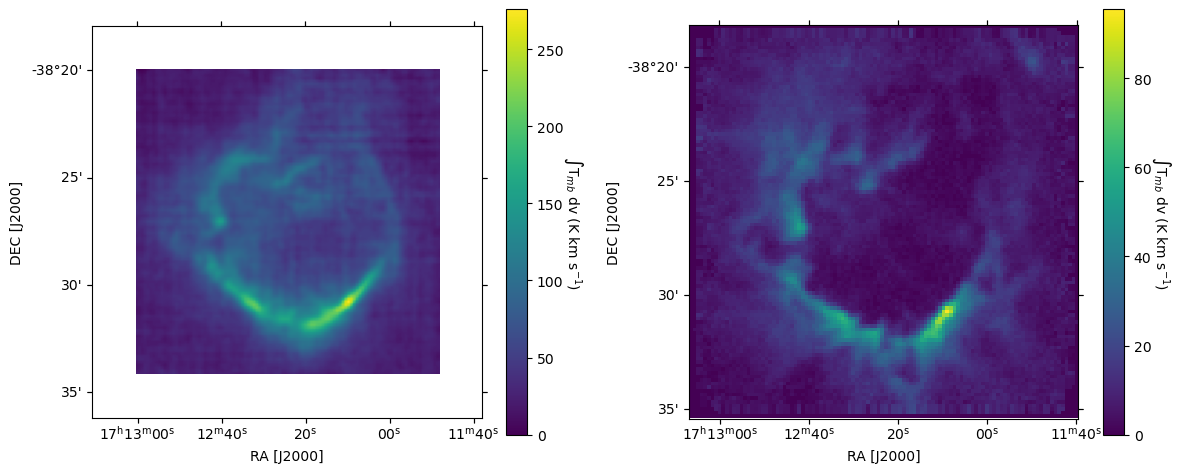

Filename: ../data_timescale/CO_data/NGC7538_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (307, 217, 566, 1)   int32 (rescales to float64)   


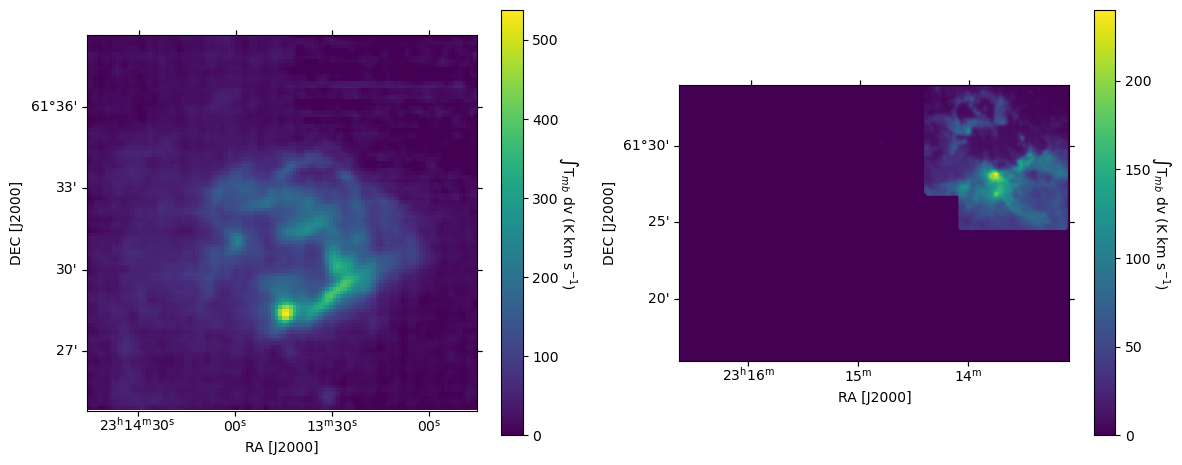

Filename: ../data_timescale/CO_data/RCW79_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (190, 185, 500)   float32   


no 4th dimension


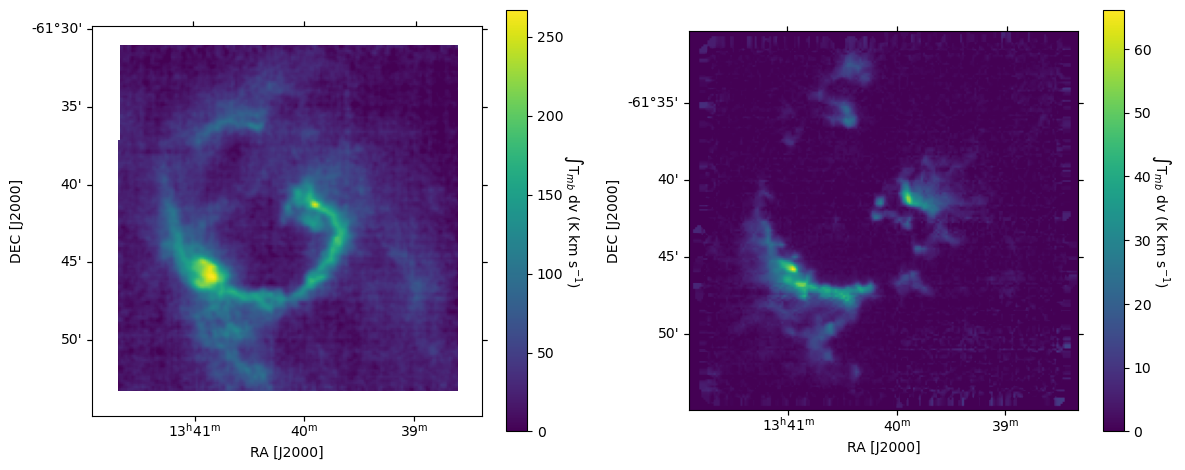

Filename: ../data_timescale/CO_data/M16_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (244, 239, 4517)   float32   


no 4th dimension


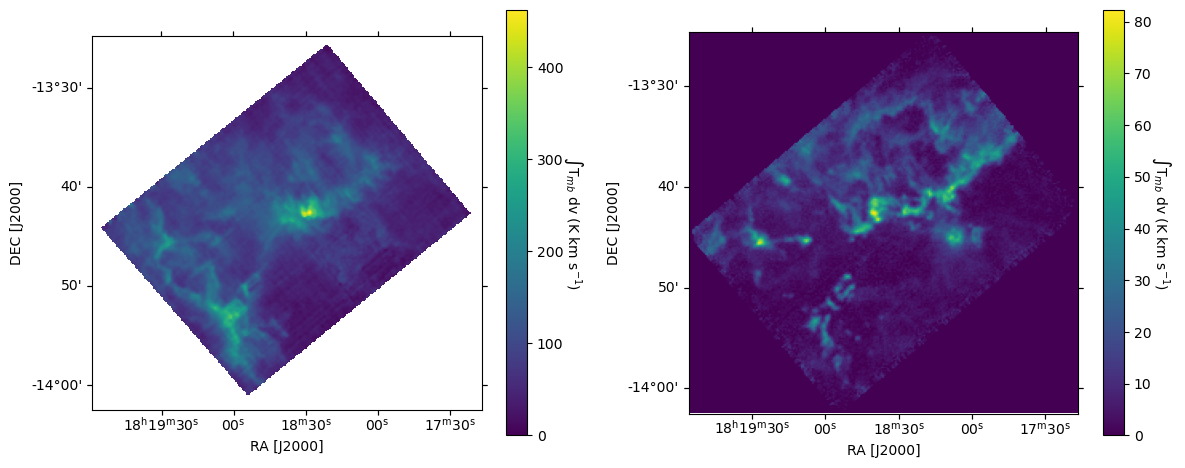

Filename: ../data_timescale/CO_data/M17_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (201, 203, 2500)   float32   


no 4th dimension


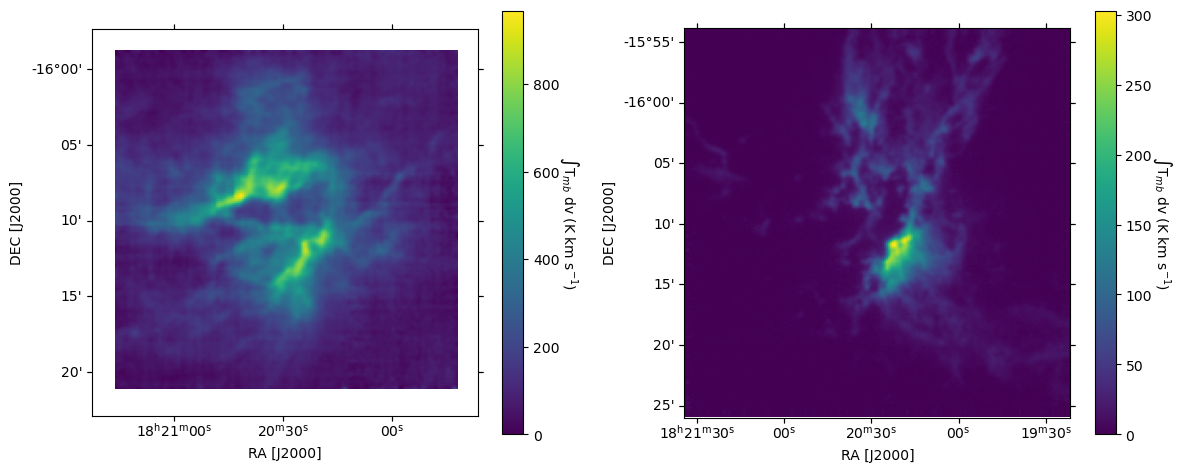

Filename: ../data_timescale/CO_data/RCW49_13CO_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (221, 216, 1000)   float32   


no 4th dimension


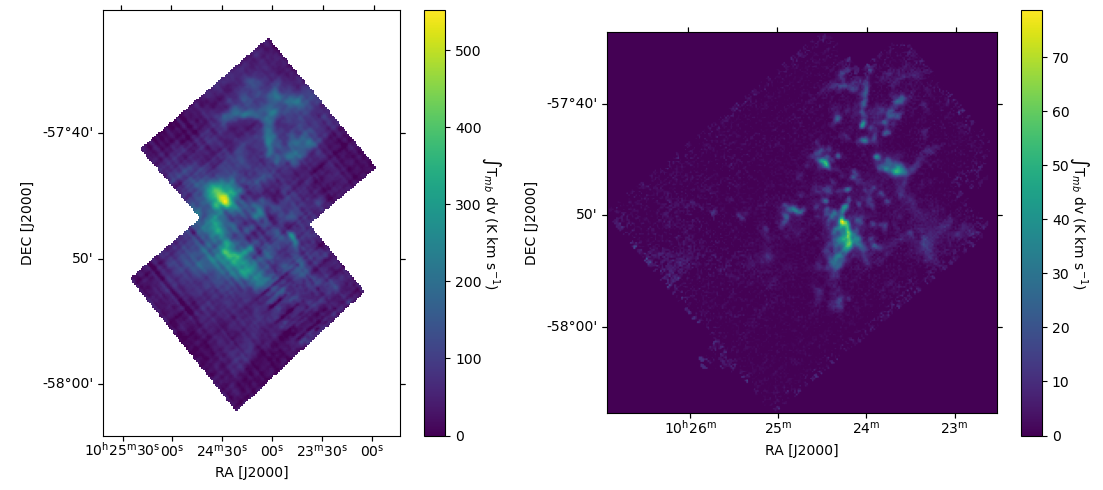

In [5]:
for name in names.keys():
    ## open the [CII] data
    hdu = pyfits.open('../data_timescale/integrated/' + name + '_integrated.fits')
    data_CII = hdu[0].data
    header_CII = hdu[0].header
    w_CII = wcs.WCS(header_CII)
    
    ## open the 13CO data
    hdu = pyfits.open('../data_timescale/CO_data/' + names[name][-1] + '_13CO_final.fits')
    hdu.info()
    data_13CO = hdu[0].data
    header_13CO = hdu[0].header
    
    ## remove 4th dimension
    if(len(data_13CO.shape) == 4):
        data_13CO = data_13CO[0]
        
    ## create the WCS
    header_13COn = header_to_2D(header_13CO.copy())
    w_13 = wcs.WCS(header_13COn)
    
    ## integrate the 13CO map
    z1 = vad.vel_to_pixel(names[name][0], 0.001*header_13CO['CRVAL3'], 0.001*header_13CO['CDELT3'], header_13CO['CRPIX3'])
    z2 = vad.vel_to_pixel(names[name][1], 0.001*header_13CO['CRVAL3'], 0.001*header_13CO['CDELT3'], header_13CO['CRPIX3'])
    if z2 < z1: z1, z2 = z2, z1 ## ensure z1 < z2 for inversed velocity axes
    map_13CO = np.nansum(data_13CO[z1:z2,:,:], axis = 0)* 0.001 * abs(header_13CO['CDELT3'])
    
    ## plot [CII] and 13CO
    plot_CII_CO(data_CII, map_13CO, w_CII, w_13)
    
    
    
    